In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
from matplotlib.dates import date2num
from utide import solve, reconstruct
import numpy as np
import pandas as pd
from windrose import WindroseAxes
import scipy as sp
import hvplot.xarray
from eofs.xarray import Eof
import glob

## Read velocity

In [3]:
files=sorted(glob.glob('GOM/new_5km-radius/GOM-1-*2012*'))
files

['GOM/new_5km-radius/GOM-1-2012-01.nc',
 'GOM/new_5km-radius/GOM-1-2012-02.nc',
 'GOM/new_5km-radius/GOM-1-2012-03.nc',
 'GOM/new_5km-radius/GOM-1-2012-04.nc',
 'GOM/new_5km-radius/GOM-1-2012-05.nc',
 'GOM/new_5km-radius/GOM-1-2012-06.nc',
 'GOM/new_5km-radius/GOM-1-2012-07.nc',
 'GOM/new_5km-radius/GOM-1-2012-08.nc',
 'GOM/new_5km-radius/GOM-1-2012-09.nc',
 'GOM/new_5km-radius/GOM-1-2012-10.nc',
 'GOM/new_5km-radius/GOM-1-2012-11.nc',
 'GOM/new_5km-radius/GOM-1-2012-12.nc']

Using only one file:

In [4]:
vel=[]
for file in files:
    tmp=xr.open_dataset(file).load()
    tmp.close()
    vel.append(tmp)

vel=xr.concat(vel, dim='ocean_time')
vel['lon']=vel.lon.mean(dim='ocean_time')
vel['lat']=vel.lat.mean(dim='ocean_time')
vel['z']=vel.z.mean(dim='ocean_time')

vel=vel.set_coords(('lon','lat','z'))
vel

<xarray.Dataset>
Dimensions:     (ocean_time: 8784, node: 23, depth: 30)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2012-01-01T01:00:00 ... 2013-01-01
    lon         (node) float64 -94.13 -94.16 -94.13 ... -94.18 -94.15 -94.13
    lat         (node) float64 29.52 29.53 29.54 29.54 ... 29.6 29.6 29.6 29.61
    z           (depth, node) float64 -12.45 -12.0 -11.68 ... -0.1291 -0.1256
Dimensions without coordinates: node, depth
Data variables:
    temp        (ocean_time, depth, node) float64 16.57 16.58 ... 14.47 14.48
    salt        (ocean_time, depth, node) float64 29.19 29.36 ... 30.6 30.57
    w           (ocean_time, depth, node) float64 4.346e-06 ... 3.179e-07
    u           (ocean_time, depth, node) float64 -0.006107 ... -0.0975
    v           (ocean_time, depth, node) float64 0.004908 0.01094 ... 0.05773
Attributes: (12/33)
    file:              /scratch/user/d.kobashi/projects/hindcasts/projects/tx...
    format:            netCDF-4/HDF5 file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Texas-Louisiana shelf hindcast with dyes
    var_info:          varinfo.dat
    ...                ...
    compiler_flags:    -fp-model fast -heap-arrays -ip -O3
    tiling:            010x012
    ana_file:          /scratch/user/d.kobashi/source_code/COAWST/Functionals...
    CPP_options:       TXLA2, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA_SPFLUX,...
    history:           Sun Feb 20 15:39:41 2022: ncrename -v depth,z 5km-radi...
    NCO:               netCDF Operators version 5.0.6 (Homepage = http://nco....

In [5]:
vel.u

<xarray.DataArray 'u' (ocean_time: 8784, depth: 30, node: 23)>
array([[[-0.00610683, -0.0050372 , -0.01163695, ..., -0.00222115,
         -0.00615486, -0.00994742],
        [-0.01541432, -0.01569566, -0.02124233, ..., -0.00239845,
         -0.00725172, -0.01223009],
        [-0.0365496 , -0.03493939, -0.03858519, ..., -0.00266805,
         -0.00872461, -0.01447519],
        ...,
        [ 0.11160411,  0.13192309,  0.14022161, ...,  0.25386137,
          0.24631432,  0.21781141],
        [ 0.1165174 ,  0.13676699,  0.14525098, ...,  0.25846633,
          0.25107305,  0.2227009 ],
        [ 0.12240317,  0.14253088,  0.15117562, ...,  0.2637746 ,
          0.25644916,  0.22818503]],

       [[-0.00561007, -0.00434381, -0.01136344, ..., -0.00408405,
         -0.00753588, -0.01166322],
        [-0.01634238, -0.01794415, -0.02220248, ..., -0.00436149,
         -0.00873054, -0.01358928],
        [-0.03554541, -0.03574635, -0.03711926, ..., -0.00457953,
         -0.00978988, -0.01500184],
...
        [-0.0620628 , -0.07016359, -0.06844229, ..., -0.084619  ,
         -0.08456109, -0.08955049],
        [-0.06401941, -0.07194264, -0.07031919, ..., -0.08645598,
         -0.08644709, -0.09160795],
        [-0.06660561, -0.07432634, -0.07283996, ..., -0.08879823,
         -0.08884395, -0.09417586]],

       [[-0.03308949, -0.03279813, -0.03117291, ..., -0.04569044,
         -0.04546809, -0.04308981],
        [-0.03878504, -0.03944937, -0.03786938, ..., -0.05458647,
         -0.05408884, -0.05165156],
        [-0.04316492, -0.04540724, -0.04423467, ..., -0.06074757,
         -0.06013733, -0.05809521],
        ...,
        [-0.06525633, -0.07362062, -0.07197745, ..., -0.08714572,
         -0.08730395, -0.09283069],
        [-0.06721355, -0.07539633, -0.07384937, ..., -0.08900199,
         -0.0892153 , -0.0949127 ],
        [-0.06980022, -0.07777739, -0.07636625, ..., -0.09135956,
         -0.0916324 , -0.09749957]]])
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2012-01-01T01:00:00 ... 2013-01-01
    lon         (node) float64 -94.13 -94.16 -94.13 ... -94.18 -94.15 -94.13
    lat         (node) float64 29.52 29.53 29.54 29.54 ... 29.6 29.6 29.6 29.61
    z           (depth, node) float64 -12.45 -12.0 -11.68 ... -0.1291 -0.1256
Dimensions without coordinates: depth, node
Attributes:
    long_name:    u-momentum component
    units:        meter second-1
    time:         ocean_time
    grid:         grid
    location:     edge1
    coordinates:  lon_u lat_u s_rho ocean_time
    field:        u-velocity, scalar, series
    _ChunkSizes:  [  1  15  96 335]

In [6]:
vel['speed']=np.sqrt(vel.u**2+vel.v**2)
angles=np.arctan2(vel.v,vel.u)
vel['direction']=(angles + 2 * np.pi) % (2 * np.pi)*(180/np.pi)

In [7]:
vel.speed.mean(dim='ocean_time').isel(depth=0)

<xarray.DataArray 'speed' (node: 23)>
array([0.04048986, 0.04039095, 0.03968935, 0.03934898, 0.03932327,
       0.03910424, 0.03882125, 0.03864422, 0.03856831, 0.03845287,
       0.03829977, 0.03799678, 0.03819385, 0.03797107, 0.03775733,
       0.03732553, 0.03718958, 0.03692755, 0.03632355, 0.03582442,
       0.0342534 , 0.03507043, 0.03333649])
Coordinates:
    lon      (node) float64 -94.13 -94.16 -94.13 -94.11 ... -94.18 -94.15 -94.13
    lat      (node) float64 29.52 29.53 29.54 29.54 ... 29.6 29.6 29.6 29.61
    z        (node) float64 -12.45 -12.0 -11.68 -11.37 ... -7.427 -7.618 -7.411
Dimensions without coordinates: node

In [8]:
means=vel.isel(depth=0).mean(dim=['node'])
#means=vel.mean(dim=['depth','node'])
wd=means.direction.data
ws=means.speed.data

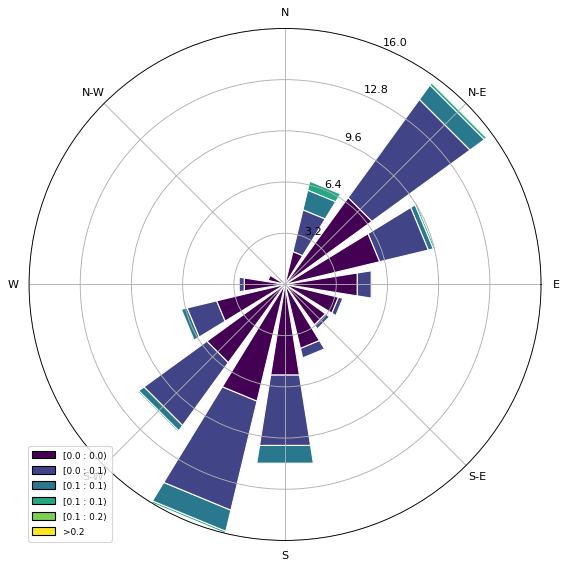

In [9]:
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [10]:
tmp=vel.mean(dim='depth').mean(dim='ocean_time')
tmp

<xarray.Dataset>
Dimensions:    (node: 23)
Coordinates:
    lon        (node) float64 -94.13 -94.16 -94.13 ... -94.18 -94.15 -94.13
    lat        (node) float64 29.52 29.53 29.54 29.54 ... 29.6 29.6 29.6 29.61
Dimensions without coordinates: node
Data variables:
    temp       (node) float64 24.36 24.36 24.36 24.36 ... 24.37 24.37 24.35
    salt       (node) float64 29.42 29.35 29.3 29.24 ... 28.57 28.42 28.39 28.41
    w          (node) float64 -5.42e-06 -3.175e-06 ... 4.397e-07 -2.903e-06
    u          (node) float64 -0.004325 -0.004186 ... -0.02248 -0.02079
    v          (node) float64 0.0008546 0.0005162 ... -0.00806 -0.001727
    speed      (node) float64 0.1107 0.1114 0.1099 ... 0.1017 0.09908 0.09304
    direction  (node) float64 182.5 176.7 182.1 186.8 ... 166.2 165.8 169.6

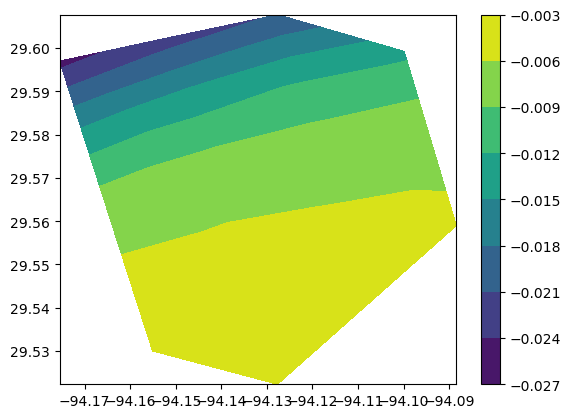

In [11]:
plt.tricontourf(tmp.lon,tmp.lat,tmp.u)
plt.colorbar()

In [12]:


from numpy.random import seed
from numpy.random import randint
seed(1)


def one_particle(vel,steps=200,num=1,sweeps=10):

## This function use the velocity field and move one particle based on random selection of depth and node and starting time in the timeseries.

    sizes=vel.sizes
    node=randint(0,sizes['node'],1)
    depth=randint(0,sizes['depth'],1)
    start=randint(0,sizes['ocean_time']-steps,1)
    time=vel.ocean_time.isel(ocean_time=start+np.arange(steps))
    time=(time.data-time[0].data)/np.timedelta64(1,'h')

    

    posx=np.zeros(steps)
    posy=np.zeros(steps)
    
    for ii in np.arange(steps-1):
        uold=vel.isel(ocean_time= start+ii,node=node,depth=depth).u.data
        unew=vel.isel(ocean_time= start+ii+1,node=node,depth=depth).u.data
        vold=vel.isel(ocean_time= start+ii+1,node=node,depth=depth).v.data
        vnew=vel.isel(ocean_time= start+ii,node=node,depth=depth).v.data
        tmpx=posx[ii]
        tmpy=posy[ii]
        
        for jj in np.arange(sweeps):
            u=(jj*unew+(sweeps-jj)*uold)/sweeps
            v=(jj*vnew+(sweeps-jj)*vold)/sweeps
            
            tmpx += u*3600/sweeps #time steps of one hour.
            tmpy += v*3600/sweeps
            
        #tmpy[ii]=vel.isel(ocean_time= start+np.arange(ii+1),node=node,depth=depth).v.integrate(coord='ocean_time',datetime_unit='s')
        #tmpx[ii]=vel.isel(ocean_time= start+np.arange(ii+1),node=node,depth=depth).u.integrate(coord='ocean_time',datetime_unit='s')
        posx[ii+1]=tmpx
        posy[ii+1]=tmpy
    
    particle=xr.Dataset(
    {
        "nodes": (["num"], node),
        "depths": (["num"], depth),
        "start": (["num"], start),
        "x":(["time"],posx),
        "y":(["time"],posy),
        "time":(["time"], time)
        },
        coords={"num": [num],
        
        })
    particle['r']=(('time',np.sqrt(particle.x.data**2+particle.y.data**2)))
    #particle['time']=time


    

    return particle

In [14]:
one_particle(vel,num=ii)

NameError: name 'ii' is not defined

In [15]:
num=500 # Number of particles to release
steps=200 # Number of time steps of one hour.

particles=[]
for ii in np.arange(num):
    particles.append(one_particle(vel,steps,num=ii))

particles=xr.concat(particles,dim='num')
#particles #uncomment to to see the results. 

In [16]:
particles

<xarray.Dataset>
Dimensions:  (num: 500, time: 200)
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 196.0 197.0 198.0 199.0
  * num      (num) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
Data variables:
    nodes    (num) int64 5 9 15 1 13 18 5 11 14 9 22 ... 19 3 4 21 6 22 0 5 18 6
    depths   (num) int64 11 11 0 12 28 20 18 28 18 17 ... 17 5 16 6 10 4 20 16 8
    start    (num) int64 5192 7813 144 7751 3462 5374 ... 1252 2604 73 1059 2895
    x        (num, time) float64 0.0 152.5 298.4 ... 5.42e+03 5.414e+03
    y        (num, time) float64 0.0 -27.64 -58.54 ... -6.015e+03 -6.185e+03
    r        (num, time) float64 0.0 155.0 304.1 ... 8.096e+03 8.22e+03

Some figures. 

(-31458.33110004344,
 28700.280894954838,
 -12532.718223196436,
 10000.33813346562)

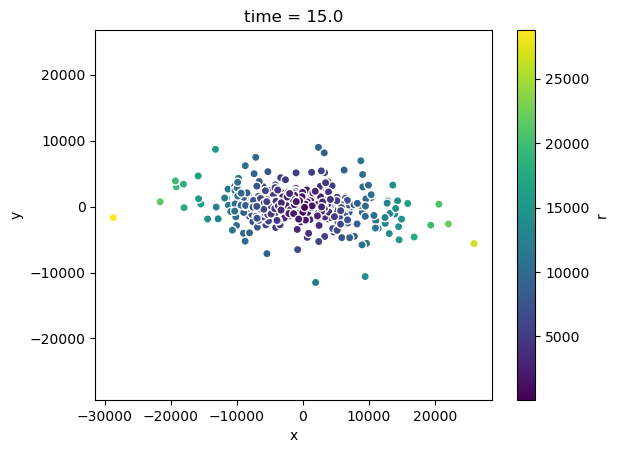

In [17]:
itime=15
particles.isel(time=itime).plot.scatter(x='x',y='y',hue='r')
plt.axis('equal')

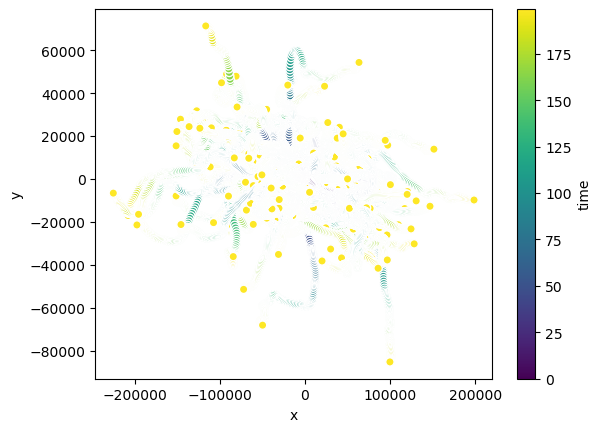

In [18]:
particles.plot.scatter(x='x',y='y',hue='time')


In [41]:
particles.r.find()

<xarray.Dataset>
Dimensions:  (r: 24501, num: 500, time: 50)
Coordinates:
  * r        (r) float64 0.0 16.26 18.84 20.73 ... 6.31e+04 6.355e+04 6.485e+04
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 45.0 46.0 47.0 48.0 49.0
  * num      (num) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
Data variables:
    nodes    (num) int64 5 9 15 1 13 18 5 11 14 9 0 ... 4 2 12 18 1 3 11 7 20 11
    depths   (num) int64 11 11 0 12 28 20 18 28 18 ... 27 3 19 0 24 12 16 8 19
    start    (num) int64 72 645 144 583 390 254 468 ... 265 550 171 608 664 266
    x        (num, time) float64 0.0 513.2 1.061e+03 ... 5.091e+03 5.264e+03
    y        (num, time) float64 0.0 -168.1 -322.8 ... -3.533e+03 -3.28e+03

In [19]:
particles.isel(time=itime)

<xarray.Dataset>
Dimensions:  (num: 500)
Coordinates:
    time     float64 15.0
  * num      (num) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
Data variables:
    nodes    (num) int64 5 9 15 1 13 18 5 11 14 9 ... 20 14 15 10 19 3 4 22 21 6
    depths   (num) int64 11 11 0 12 28 20 18 28 18 ... 14 27 14 18 17 5 29 16 6
    start    (num) int64 5192 7813 144 7751 3462 ... 6361 8680 4603 1864 6648
    x        (num) float64 2.057e+03 2.145e+03 -307.4 ... -1.033e+04 -3.302e+03
    y        (num) float64 -450.5 148.6 687.6 729.0 ... 1.846e+03 -689.3 -537.0
    r        (num) float64 2.106e+03 2.15e+03 753.1 ... 1.036e+04 3.345e+03

## Quantiles as function of time

In [19]:
particles.time

<xarray.DataArray 'time' (time: 200)>
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
       108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154., 155.,
       156., 157., 158., 159., 160., 161., 162., 163., 164., 165., 166., 167.,
       168., 169., 170., 171., 172., 173., 174., 175., 176., 177., 178., 179.,
       180., 181., 182., 183., 184., 185., 186., 187., 188., 189., 190., 191.,
       192., 193., 194., 195., 196., 197., 198., 199.])
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 196.0 197.0 198.0 199.0

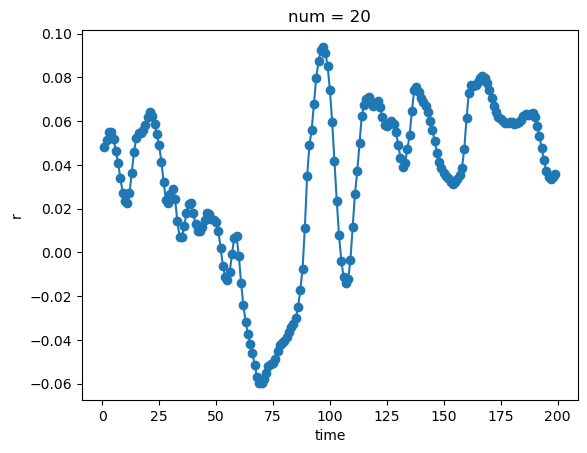

In [20]:
(particles.r.diff('time')/3600).isel(num=20).plot(marker='o')



## Estimates of density. 
Adjusting for larger radius, 

Radius if a ring with inner radius $r_0$ and outer radius $r_0+\delta$ using $\delta=1$.
$$ A =\pi \delta (2r_0+\delta)$$

In [21]:
delR=100 # The thickness of the rings
num_bins=20 #number of bins
r_bins=np.append([5,10,20,30,50], (1+np.arange(num_bins))*delR)

r_bins


array([   5,   10,   20,   30,   50,  100,  200,  300,  400,  500,  600,
        700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
       1800, 1900, 2000])

In [22]:
particles

<xarray.Dataset>
Dimensions:  (num: 500, time: 200)
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 196.0 197.0 198.0 199.0
  * num      (num) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
Data variables:
    nodes    (num) int64 5 9 15 1 13 18 5 11 14 9 22 ... 19 3 4 21 6 22 0 5 18 6
    depths   (num) int64 11 11 0 12 28 20 18 28 18 17 ... 17 5 16 6 10 4 20 16 8
    start    (num) int64 5192 7813 144 7751 3462 5374 ... 1252 2604 73 1059 2895
    x        (num, time) float64 0.0 152.5 298.4 ... 5.42e+03 5.414e+03
    y        (num, time) float64 0.0 -27.64 -58.54 ... -6.015e+03 -6.185e+03
    r        (num, time) float64 0.0 155.0 304.1 ... 8.096e+03 8.22e+03

In [23]:
np.shape(1./(np.pi*delR*(2*particles.r.data+delR)))

(500, 200)

(array([3., 3., 3., 3., 4., 3., 4., 3., 4., 4., 4., 4., 4., 5., 4., 5., 5.,
        4., 5., 5., 5., 6., 5., 5., 5., 6., 6., 5., 6., 6., 6., 6., 7., 6.,
        7., 6., 6., 6., 8., 8.]),
 array([    0.        ,  1069.89744654,  2139.79489307,  3209.69233961,
         4279.58978615,  5349.48723268,  6419.38467922,  7489.28212576,
         8559.17957229,  9629.07701883, 10698.97446537, 11768.8719119 ,
        12838.76935844, 13908.66680498, 14978.56425151, 16048.46169805,
        17118.35914459, 18188.25659112, 19258.15403766, 20328.0514842 ,
        21397.94893073, 22467.84637727, 23537.74382381, 24607.64127034,
        25677.53871688, 26747.43616342, 27817.33360995, 28887.23105649,
        29957.12850303, 31027.02594956, 32096.9233961 , 33166.82084264,
        34236.71828917, 35306.61573571, 36376.51318225, 37446.41062879,
        38516.30807532, 39586.20552186, 40656.1029684 , 41726.00041493,
        42795.89786147]),
 <BarContainer object of 40 artists>)

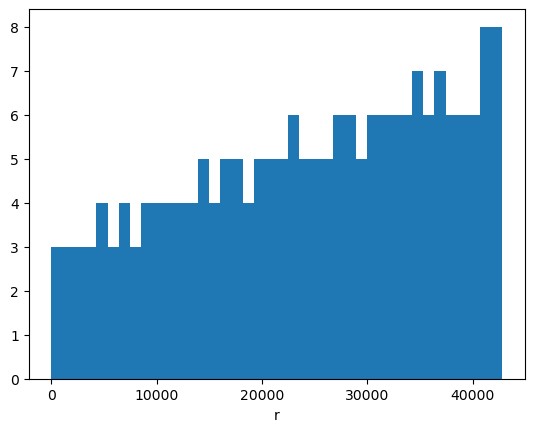

In [24]:
particles.r.mean(dim='num').plot.hist(bins=40)

In [25]:
particles['con']=((['num','time'],1./(np.pi*delR*(2*particles.r.data+delR)))) #Each particle contributes to density with 1/A.
#particles['A']=1./(np.pi*r_bins**2)
particles['A']=((['num','time'],1/(np.pi*particles.r.data**2+1e-6)))
particles

<xarray.Dataset>
Dimensions:  (num: 500, time: 200)
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 196.0 197.0 198.0 199.0
  * num      (num) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
Data variables:
    nodes    (num) int64 5 9 15 1 13 18 5 11 14 9 22 ... 19 3 4 21 6 22 0 5 18 6
    depths   (num) int64 11 11 0 12 28 20 18 28 18 17 ... 17 5 16 6 10 4 20 16 8
    start    (num) int64 5192 7813 144 7751 3462 5374 ... 1252 2604 73 1059 2895
    x        (num, time) float64 0.0 152.5 298.4 ... 5.42e+03 5.414e+03
    y        (num, time) float64 0.0 -27.64 -58.54 ... -6.015e+03 -6.185e+03
    r        (num, time) float64 0.0 155.0 304.1 ... 8.096e+03 8.22e+03
    con      (num, time) float64 3.183e-05 7.765e-06 ... 1.954e-07 1.925e-07
    A        (num, time) float64 1e+06 1.326e-05 ... 4.856e-09 4.711e-09

In [26]:
tmp=particles.stack(z=['num','time'])

In [27]:
rr=np.arange(5,2000,5)
cc=np.zeros(len(rr))


In [28]:
rr

array([   5,   10,   15,   20,   25,   30,   35,   40,   45,   50,   55,
         60,   65,   70,   75,   80,   85,   90,   95,  100,  105,  110,
        115,  120,  125,  130,  135,  140,  145,  150,  155,  160,  165,
        170,  175,  180,  185,  190,  195,  200,  205,  210,  215,  220,
        225,  230,  235,  240,  245,  250,  255,  260,  265,  270,  275,
        280,  285,  290,  295,  300,  305,  310,  315,  320,  325,  330,
        335,  340,  345,  350,  355,  360,  365,  370,  375,  380,  385,
        390,  395,  400,  405,  410,  415,  420,  425,  430,  435,  440,
        445,  450,  455,  460,  465,  470,  475,  480,  485,  490,  495,
        500,  505,  510,  515,  520,  525,  530,  535,  540,  545,  550,
        555,  560,  565,  570,  575,  580,  585,  590,  595,  600,  605,
        610,  615,  620,  625,  630,  635,  640,  645,  650,  655,  660,
        665,  670,  675,  680,  685,  690,  695,  700,  705,  710,  715,
        720,  725,  730,  735,  740,  745,  750,  7

In [29]:
particles.r.isel(num=1)

<xarray.DataArray 'r' (time: 200)>
array([    0.        ,   113.58620699,   269.77931504,   459.5335674 ,
         662.05172531,   864.0977015 ,  1060.04359576,  1248.87763583,
        1433.35964648,  1611.39694336,  1773.99788989,  1912.82619839,
        2022.68228961,  2100.44867069,  2143.65038686,  2151.85183639,
        2127.99834006,  2079.07791498,  2012.56455134,  1931.22569343,
        1842.89446523,  1760.90095018,  1687.37374611,  1617.96244731,
        1549.26829554,  1481.66516635,  1414.9504263 ,  1347.79893854,
        1282.19773437,  1221.68819867,  1167.3673104 ,  1118.90450436,
        1073.88756323,  1030.45174234,   988.38962683,   936.21353506,
         861.98243471,   775.26548666,   683.91600177,   575.17241604,
         463.79690589,   377.36732474,   323.291394  ,   311.27222365,
         343.37888428,   403.01499985,   476.8661814 ,   563.35161702,
         659.34491079,   763.52825887,   877.85137714,  1001.10833942,
        1129.87852499,  1256.41340658,  1373.37421055,  1478.09888447,
        1566.7181651 ,  1630.55309369,  1655.62030343,  1629.61934056,
        1547.5957814 ,  1412.47370079,  1373.85929753,  1503.61096962,
        1659.17401132,  1816.00702462,  1996.58271934,  2203.21861788,
        2422.24129406,  2652.61684026,  2900.57868389,  3173.40540051,
        3479.00463436,  3818.87154294,  4193.10582973,  4588.89355377,
        4987.90330975,  5387.94086154,  5798.71793353,  6229.6761498 ,
...
       24447.75722267, 24857.56360755, 25215.94928439, 25559.50772304,
       25898.46819744, 26216.70528405, 26503.21401709, 26764.51859251,
       27020.57278487, 27284.24608671, 27552.01957088, 27815.05359323,
       28057.15065896, 28267.71565376, 28449.1161853 , 28611.62256879,
       28763.94267373, 28909.44808506, 29044.26223873, 29156.62031547,
       29231.88296216, 29261.80880041, 29244.49058634, 29166.35842925,
       29015.48046431, 28801.97122289, 28539.23042737, 28232.35240309,
       27899.39013743, 27602.90923219, 27420.08497522, 27370.48938102,
       27437.08173808, 27593.20263597, 27802.65344294, 28041.94755313,
       28298.47219409, 28587.23847439, 28927.96894004, 29315.35404923,
       29728.84862739, 30156.67928014, 30581.14436083, 31007.03485553,
       31455.09784031, 31918.92961906, 32388.12523054, 32854.74160763,
       33320.93726366, 33792.69718286, 34274.82582146, 34764.06460727,
       35249.39477763, 35721.19868068, 36190.5641212 , 36674.93377695,
       37166.12029415, 37656.41667317, 38145.6544188 , 38630.5621924 ,
       39109.77569281, 39589.51692585, 40078.34006554, 40573.44177498,
       41068.85332309, 41568.56798915, 42066.3049112 , 42549.4837343 ,
       43010.24308607, 43437.26854125, 43827.60685362, 44185.46491973,
       44521.86926717, 44846.18452289, 45161.7133265 , 45467.92531221,
       45764.23194377, 46058.44777818, 46357.07536944, 46664.75865741])
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 196.0 197.0 198.0 199.0
    num      int64 1

In [369]:
particles.r

<xarray.DataArray 'r' (time: 200)>
array([    0.        ,   295.53763693,   573.29638675,   842.27333982,
        1116.60702693,  1403.32359847,  1699.48562955,  1999.58433141,
        2302.9969401 ,  2615.06040763,  2938.1147127 ,  3269.52195634,
        3601.91326093,  3926.93750122,  4243.68056442,  4553.63115499,
        4856.27320851,  5151.43097181,  5447.2900854 ,  5753.64298369,
        6070.81128817,  6396.88360559,  6727.06853118,  7053.38417999,
        7368.70707472,  7666.79076166,  7945.44535238,  8210.65954943,
        8472.31433933,  8734.90698671,  8996.48845498,  9257.3536209 ,
        9519.36856609,  9783.4852229 , 10049.31561521, 10314.36149158,
       10577.78016207, 10844.77007867, 11119.31332427, 11401.96286023,
       11693.95836408, 11996.02828441, 12308.29690472, 12627.55261321,
       12953.22991955, 13289.32212065, 13633.02986734, 13970.87001788,
       14298.21360821, 14624.99506292, 14961.99046619, 15314.41771405,
       15679.46328283, 16051.80691874, 16428.25513866, 16810.52396077,
       17203.52984725, 17604.90151633, 18002.82574074, 18384.14249697,
       18743.5476552 , 19085.34232411, 19414.88867396, 19732.54983469,
       20035.3922921 , 20321.50560541, 20598.3434436 , 20881.27806747,
       21186.80434358, 21527.80152576, 21904.29940332, 22303.68898267,
       22716.91881379, 23151.3105258 , 23622.48635286, 24138.86545741,
       24704.84804774, 25317.75233969, 25964.22531098, 26628.8554726 ,
...
       46639.36660644, 46618.22565412, 46584.3921792 , 46537.41408114,
       46478.05053764, 46411.95791699, 46340.12660949, 46269.40512282,
       46210.0173553 , 46151.4742292 , 46074.54786485, 45971.95721507,
       45848.30183544, 45720.21481357, 45607.63925501, 45516.13342267,
       45434.51619658, 45347.8087843 , 45246.4767792 , 45130.04673888,
       44999.81934364, 44853.13960994, 44690.50323829, 44515.76442875,
       44326.30087966, 44117.35715309, 43887.7184123 , 43640.84335229,
       43390.21746522, 43148.76759127, 42922.83354373, 42713.99625093,
       42522.72444126, 42351.09026283, 42197.72501714, 42063.32791787,
       41949.32186762, 41852.171994  , 41769.19371192, 41702.67417683,
       41656.05803238, 41628.85991825, 41620.54633484, 41626.87675346,
       41636.8092596 , 41642.11851128, 41639.31408231, 41624.11197431,
       41593.45308558, 41543.3908533 , 41468.93975514, 41372.5019361 ,
       41261.48421805, 41144.13363254, 41031.57863526, 40932.27460123,
       40850.00254848, 40780.53210968, 40711.80388912, 40639.94963751,
       40569.23612402, 40509.83582459, 40482.812799  , 40489.60858677,
       40506.06545582, 40522.66027099, 40542.80110902, 40566.66408917,
       40596.01930895, 40641.29044368, 40710.8531425 , 40804.37515419,
       40865.74054398, 40885.08760309, 40905.04406138, 40917.75770126,
       40921.87803455, 40916.39720403, 40884.61515038, 40811.25756898])
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 196.0 197.0 198.0 199.0
    num      int64 1

In [30]:
time_stat=np.zeros_like(rr)
time_stat2=np.zeros_like(rr)
N=np.zeros_like(rr)
for ii in np.arange(len(rr)):
    for num in particles.num:
        
        indx=np.where(np.diff(np.sign(particles.isel(num=num).r-rr[ii])) !=0)[0]
        #indx=indx[0]
        time_stat[ii]+=particles.time[indx].sum()
        time_stat2[ii]+=(particles.time[indx]**2).sum()
        N[ii] += len(indx)



In [500]:
N

array([500, 502, 502, 502, 502, 502, 506, 506, 506, 508, 506, 506, 508,
       508, 512, 510, 508, 510, 510, 512, 512, 514, 514, 512, 516, 518,
       518, 518, 518, 518, 518, 518, 520, 520, 520, 524, 522, 522, 522,
       522, 522, 522, 522, 526, 530, 530, 530, 530, 530, 528, 528, 526,
       526, 528, 534, 534, 534, 532, 532, 532, 532, 532, 534, 534, 536,
       538, 538, 536, 534, 534, 536, 536, 540, 540, 538, 538, 540, 540,
       540, 540, 540, 540, 540, 540, 540, 540, 542, 544, 544, 544, 546,
       546, 548, 548, 548, 548, 550, 552, 556, 556, 554, 554, 556, 556,
       558, 558, 560, 564, 568, 568, 568, 568, 570, 570, 570, 568, 566,
       566, 566, 564, 564, 564, 562, 562, 562, 562, 562, 562, 562, 562,
       562, 562, 564, 566, 568, 568, 568, 568, 568, 570, 570, 572, 574,
       572, 572, 572, 572, 572, 572, 576, 576, 576, 578, 580, 578, 578,
       578, 580, 582, 582, 582, 580, 578, 580, 580, 580, 580, 580, 580,
       580, 580, 584, 584, 584, 584, 584, 582, 580, 582, 584, 58

In [31]:
time_mn=time_stat/N
time_std=np.sqrt(time_stat2/N-time_mn**2)

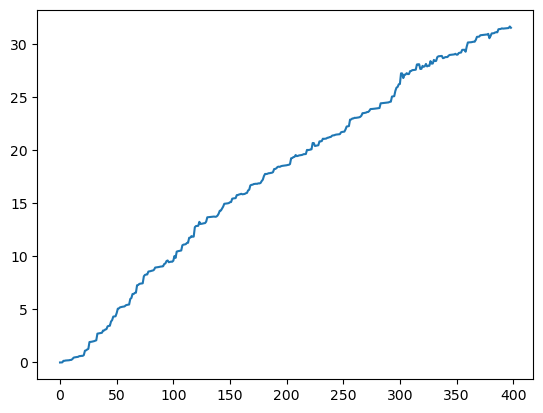

In [32]:
plt.plot(time_mn)

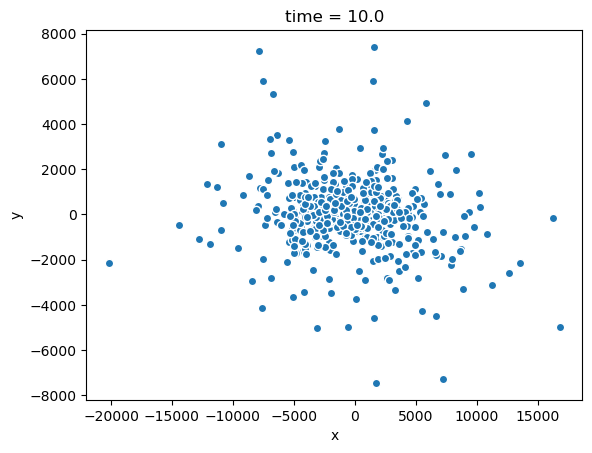

In [33]:
particles.isel(time=10).plot.scatter(x='x',y='y')

In [687]:

particles.isel(time=2).groupby_bins('r',r_bins).count()

<xarray.Dataset>
Dimensions:  (r_bins: 24)
Coordinates:
  * r_bins   (r_bins) object (5, 10] (10, 20] ... (1800, 1900] (1900, 2000]
    time     float64 2.0
Data variables:
    nodes    (r_bins) float64 nan 4.0 2.0 9.0 32.0 77.0 ... 2.0 1.0 1.0 1.0 nan
    depths   (r_bins) float64 nan 4.0 2.0 9.0 32.0 77.0 ... 2.0 1.0 1.0 1.0 nan
    start    (r_bins) float64 nan 4.0 2.0 9.0 32.0 77.0 ... 2.0 1.0 1.0 1.0 nan
    x        (r_bins) float64 nan 4.0 2.0 9.0 32.0 77.0 ... 2.0 1.0 1.0 1.0 nan
    y        (r_bins) float64 nan 4.0 2.0 9.0 32.0 77.0 ... 2.0 1.0 1.0 1.0 nan
    r        (r_bins) float64 nan 4.0 2.0 9.0 32.0 77.0 ... 2.0 1.0 1.0 1.0 nan
    con      (r_bins) float64 nan 4.0 2.0 9.0 32.0 77.0 ... 2.0 1.0 1.0 1.0 nan
    A        (r_bins) float64 nan 4.0 2.0 9.0 32.0 77.0 ... 2.0 1.0 1.0 1.0 nan

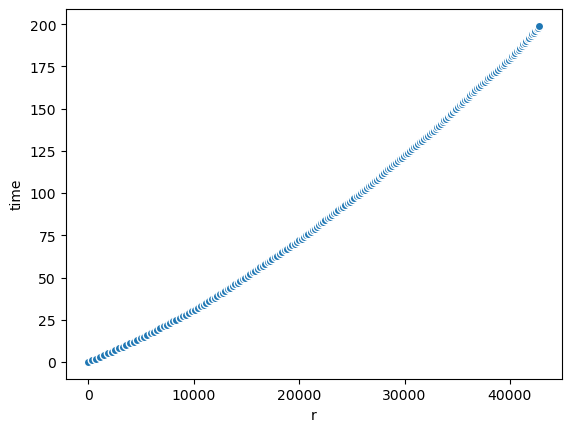

In [37]:
particles.mean(dim='num').plot.scatter(x='r',y='time')
plt.xlim(0,2000)
#plt.ylim(0,8)

In [ ]:
(dim='num').plot.scatter(x='r',y='time')
#plt.xlim(0,2000)
#plt.ylim(0,8)

(0.0, 6.0)

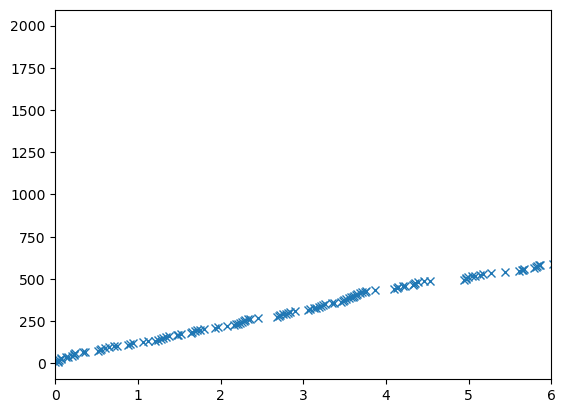

In [636]:
plt.plot(time_mn,rr,'x')
plt.xlim(0,6)

(0.0, 1000.0)

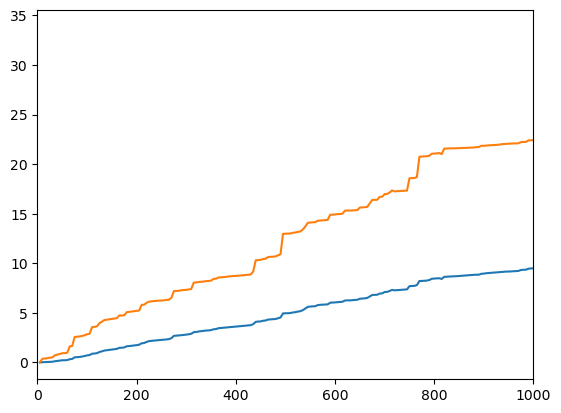

In [553]:
plt.plot(rr,time_mn)
plt.plot(rr,time_mn+0.96*time_std)
plt.xlim(0,1000)

In [539]:
rr

array([   5,   10,   15,   20,   25,   30,   35,   40,   45,   50,   55,
         60,   65,   70,   75,   80,   85,   90,   95,  100,  105,  110,
        115,  120,  125,  130,  135,  140,  145,  150,  155,  160,  165,
        170,  175,  180,  185,  190,  195,  200,  205,  210,  215,  220,
        225,  230,  235,  240,  245,  250,  255,  260,  265,  270,  275,
        280,  285,  290,  295,  300,  305,  310,  315,  320,  325,  330,
        335,  340,  345,  350,  355,  360,  365,  370,  375,  380,  385,
        390,  395,  400,  405,  410,  415,  420,  425,  430,  435,  440,
        445,  450,  455,  460,  465,  470,  475,  480,  485,  490,  495,
        500,  505,  510,  515,  520,  525,  530,  535,  540,  545,  550,
        555,  560,  565,  570,  575,  580,  585,  590,  595,  600,  605,
        610,  615,  620,  625,  630,  635,  640,  645,  650,  655,  660,
        665,  670,  675,  680,  685,  690,  695,  700,  705,  710,  715,
        720,  725,  730,  735,  740,  745,  750,  7

In [540]:
np.mean(np.diff(time_stat)/5)


4.907537688442211

In [508]:
(particles.time[indx]**2).sum()

<xarray.DataArray 'time' ()>
array(16.)

In [402]:
particles.isel(num=1).isel(time=indx[1]+1)

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    time     float64 175.0
    num      int64 1
Data variables:
    nodes    int64 17
    depths   int64 18
    start    int64 7101
    x        float64 -3.793e+04
    y        float64 -1.54e+04
    r        float64 4.093e+04

In [366]:
time_mean=[]
for r in rr:
    particles.where(np.abs(particles.r-1303)<5,drop=True).isel(num=1).time.mean()

<xarray.DataArray 'time' ()>
array(22.22727273)
Coordinates:
    num      int64 13

In [511]:
tmp=particles.stack(z=['time','num'])

In [ ]:
for r in rr:
    tt=tmp.r-r

In [617]:
tt

<xarray.DataArray 'r' ()>
array(0.01763037)

In [512]:
c=[]
l=5*1.2
for r in rr:
    tt=np.exp(-((tmp.r-r)/l)**2).sum()/np.pi**(1.5)/l**3
    c.append(tt)

c=xr.concat(c,dim='r')
c=c.assign_coords(r=rr)

In [616]:
c

<xarray.DataArray 'r' (r: 399)>
array([0.21254703, 0.03164167, 0.00913072, 0.01102146, 0.01214645,
       0.01714349, 0.02602454, 0.03035967, 0.0232747 , 0.01496291,
       0.01789739, 0.02195983, 0.02504286, 0.02868655, 0.02924594,
       0.02752483, 0.03202712, 0.03716206, 0.03865038, 0.03549069,
       0.0314893 , 0.02756855, 0.02780415, 0.02732834, 0.0253287 ,
       0.03092106, 0.03589367, 0.03536973, 0.03184488, 0.02947964,
       0.03035142, 0.03275273, 0.03195134, 0.02885129, 0.02958437,
       0.03264248, 0.03110442, 0.03263104, 0.03586595, 0.03648619,
       0.03614078, 0.03188925, 0.03425058, 0.03644595, 0.03016722,
       0.02770019, 0.02938303, 0.0281315 , 0.02533355, 0.02455939,
       0.03006821, 0.03423399, 0.03422624, 0.03190691, 0.02448808,
       0.01924009, 0.02358893, 0.03079257, 0.03061019, 0.03126731,
       0.03516746, 0.03368186, 0.02855115, 0.03068851, 0.03197081,
       0.03043269, 0.02771809, 0.02522157, 0.02678592, 0.02592195,
       0.02178786, 0.02454481, 0.02632239, 0.02693396, 0.02718533,
       0.02416315, 0.0224964 , 0.02263316, 0.02145118, 0.02022968,
       0.0209695 , 0.02684947, 0.02917331, 0.02661242, 0.02331273,
       0.01808716, 0.02034435, 0.02399996, 0.02434336, 0.02567758,
       0.02838343, 0.03065123, 0.02852005, 0.02304277, 0.02277529,
       0.027804  , 0.03370424, 0.03221926, 0.02698739, 0.02360109,
...
       0.01618311, 0.01949418, 0.01855842, 0.01735856, 0.02035084,
       0.02430821, 0.02265605, 0.0180506 , 0.01646854, 0.01607012,
       0.01610053, 0.0153609 , 0.01566939, 0.01852766, 0.02123372,
       0.02196067, 0.0177639 , 0.01498183, 0.01602413, 0.02046309,
       0.0200842 , 0.01869548, 0.01520132, 0.01409327, 0.01795197,
       0.01890643, 0.01892938, 0.0177784 , 0.01829785, 0.01678581,
       0.01594906, 0.01805227, 0.02017684, 0.01639796, 0.01230313,
       0.01346837, 0.01465927, 0.01817723, 0.01835617, 0.01353484,
       0.00989404, 0.01316487, 0.02026007, 0.02119253, 0.01694922,
       0.01472888, 0.01459126, 0.01514724, 0.01788909, 0.01750803,
       0.01371042, 0.01151405, 0.01163561, 0.01183102, 0.01076445,
       0.015577  , 0.02006412, 0.01735954, 0.01394563, 0.01055492,
       0.01262153, 0.01973923, 0.0227973 , 0.02046486, 0.01591031,
       0.01349028, 0.01234582, 0.01438292, 0.01672057, 0.02006005,
       0.019949  , 0.01473292, 0.01229198, 0.01363471, 0.01346739,
       0.01264565, 0.01197381, 0.01374367, 0.01786864, 0.01688241,
       0.01417468, 0.01829632, 0.02057991, 0.01690501, 0.01490266,
       0.01272463, 0.0127872 , 0.01352339, 0.01218755, 0.01049835,
       0.00969949, 0.00992528, 0.01324605, 0.01343749, 0.01394834,
       0.02017415, 0.02307653, 0.02039902, 0.01763037])
Coordinates:
  * r        (r) int64 5 10 15 20 25 30 35 ... 1970 1975 1980 1985 1990 1995

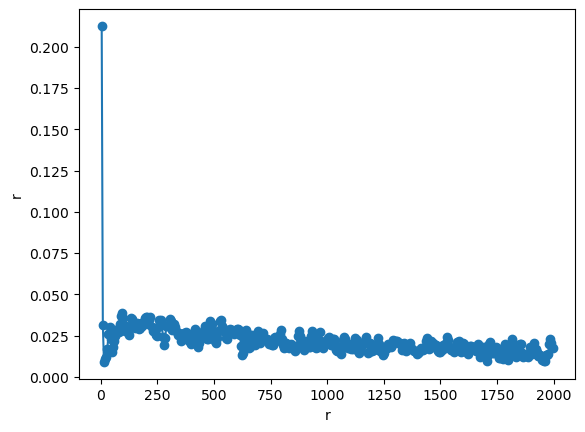

In [513]:
c.plot(x='r',marker='o')
#plt.xlim(0,20)


(0.0, 1.5)

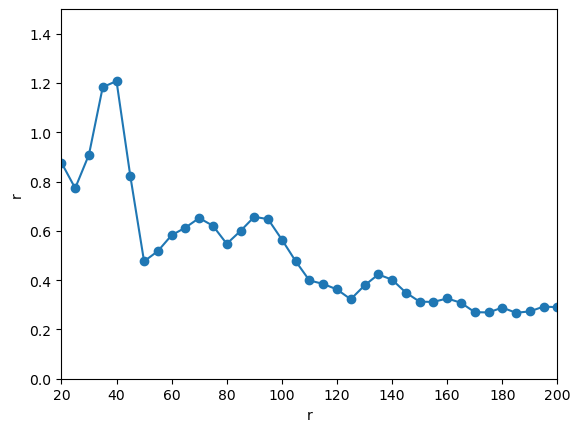

In [515]:
(10**4*c/(2*np.pi*c.r)).plot(marker='o') 
plt.xlim(20,200)
plt.ylim(0,1.5)

In [233]:
c.sum()

<xarray.DataArray 'r' ()>
array(17.41357172)

bins in radius.


In [516]:
cons=[]
for ii in np.arange(particles.sizes['time']):
    try:
        tmp=particles.isel(time=np.arange(ii)).groupby_bins('r',r_bins).sum().con
        #tmp=particles.isel(time=ii).groupby_bins('r',r_bins).sum().con
        tmp['time']=particles.isel(time=ii).time
    except:
        tmp=xr.zeros_like(particles.isel(time=1).groupby_bins('r',r_bins).sum().con)
        tmp['time']=ii
    cons.append(tmp)
cons=xr.concat(cons,dim='time')


In [517]:
cons

<xarray.DataArray 'con' (time: 200, r_bins: 24)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00011461, 0.00011961, 0.00018989, ...,        nan,        nan,
               nan],
       ...,
       [0.00014157, 0.00021591, 0.00027587, ..., 0.00014856, 0.00015001,
        0.00013516],
       [0.00014157, 0.00021591, 0.00027587, ..., 0.00014856, 0.00015001,
        0.00013516],
       [0.00014157, 0.00021591, 0.00027587, ..., 0.00014856, 0.00015001,
        0.00013516]])
Coordinates:
  * r_bins   (r_bins) object (5, 10] (10, 20] ... (1800, 1900] (1900, 2000]
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 196.0 197.0 198.0 199.0

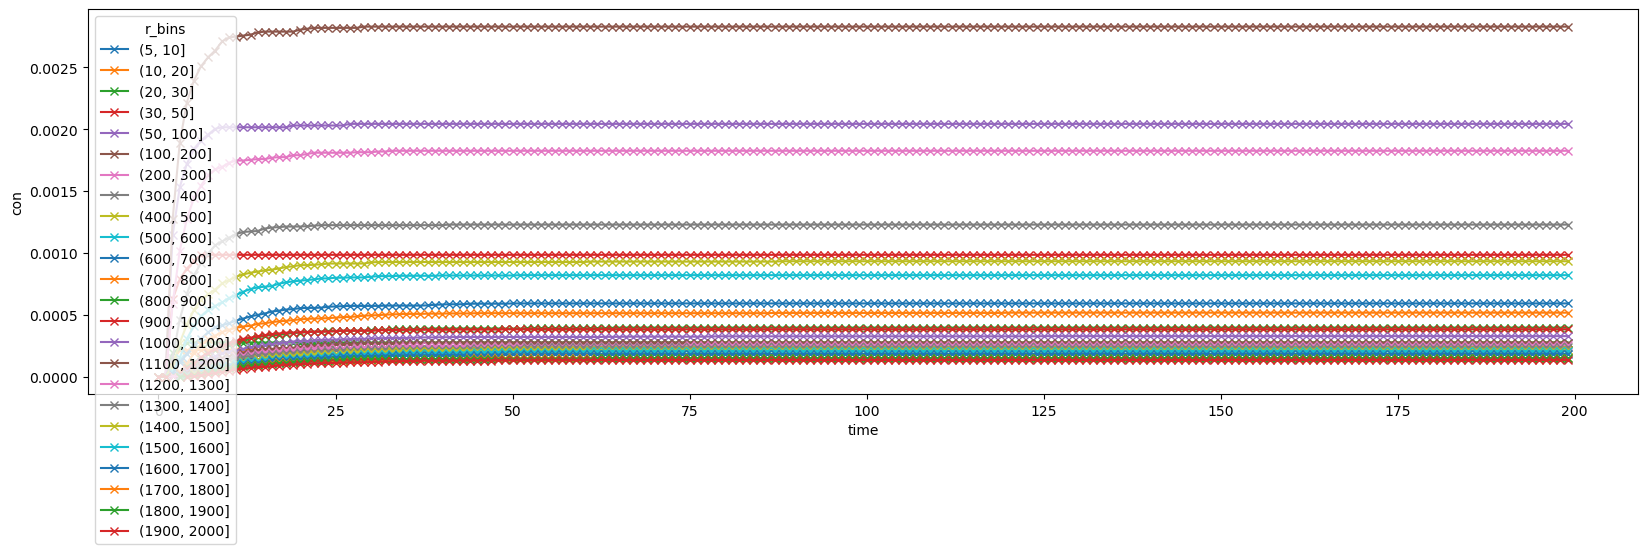

In [690]:
cons.plot.line(x='time',marker='x',aspect=4, size=5)
#plt.yscale('log')
#plt.xlim(1,30)


In [143]:
cons

<xarray.DataArray 'con' (time: 50, r_bins: 24)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [           nan, 1.48623746e-04, 2.07289985e-05, ...,
                   nan,            nan, 7.94399084e-07],
       ...,
       [           nan, 1.74725814e-04, 1.05003427e-04, ...,
        2.05824787e-04, 1.95555986e-04, 1.90958334e-04],
       [           nan, 1.74725814e-04, 1.05003427e-04, ...,
        2.07593645e-04, 1.96403482e-04, 1.93361377e-04],
       [           nan, 1.74725814e-04, 1.05003427e-04, ...,
        2.08489496e-04, 2.00528940e-04, 1.94936021e-04]])
Coordinates:
  * r_bins   (r_bins) object (5, 10] (10, 20] ... (1800, 1900] (1900, 2000]
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 45.0 46.0 47.0 48.0 49.0

In [109]:
cons.r_bins

<xarray.DataArray 'r_bins' (r_bins: 24)>
array([Interval(5, 10, closed='right'), Interval(10, 20, closed='right'),
       Interval(20, 30, closed='right'), Interval(30, 50, closed='right'),
       Interval(50, 100, closed='right'), Interval(100, 200, closed='right'),
       Interval(200, 300, closed='right'), Interval(300, 400, closed='right'),
       Interval(400, 500, closed='right'), Interval(500, 600, closed='right'),
       Interval(600, 700, closed='right'), Interval(700, 800, closed='right'),
       Interval(800, 900, closed='right'), Interval(900, 1000, closed='right'),
       Interval(1000, 1100, closed='right'),
       Interval(1100, 1200, closed='right'),
       Interval(1200, 1300, closed='right'),
       Interval(1300, 1400, closed='right'),
       Interval(1400, 1500, closed='right'),
       Interval(1500, 1600, closed='right'),
       Interval(1600, 1700, closed='right'),
       Interval(1700, 1800, closed='right'),
       Interval(1800, 1900, closed='right'),
       Interval(1900, 2000, closed='right')], dtype=object)
Coordinates:
  * r_bins   (r_bins) object (5, 10] (10, 20] ... (1800, 1900] (1900, 2000]

In [110]:
r_bins

array([   5,   10,   20,   30,   50,  100,  200,  300,  400,  500,  600,
        700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
       1800, 1900, 2000])

In [111]:
rr=r_bins[0:-1]+np.diff(r_bins)/2
rr

array([   7.5,   15. ,   25. ,   40. ,   75. ,  150. ,  250. ,  350. ,
        450. ,  550. ,  650. ,  750. ,  850. ,  950. , 1050. , 1150. ,
       1250. , 1350. , 1450. , 1550. , 1650. , 1750. , 1850. , 1950. ])

In [144]:
cons=cons.assign_coords(rr=('r_bins',rr))

(0.0, 200.0)

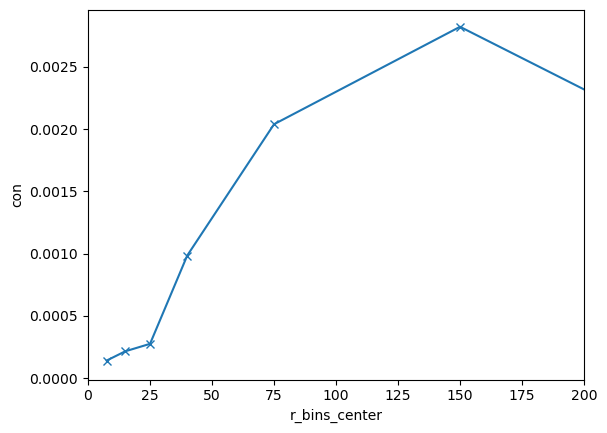

In [691]:
cons.isel(time=slice(10,100)).mean(dim='time').plot(marker='x')
plt.xlim(0,200)

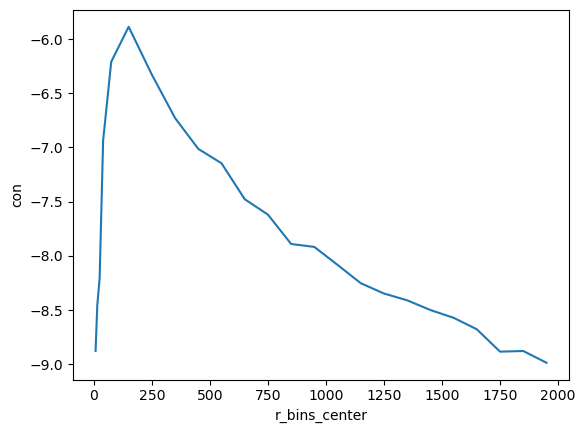

In [520]:
np.log(cons.mean(dim='time')).plot()

### To be continued...

In [609]:
temp=xr.open_dataset('GOM/temp.nc')

(0.0, 250.0)

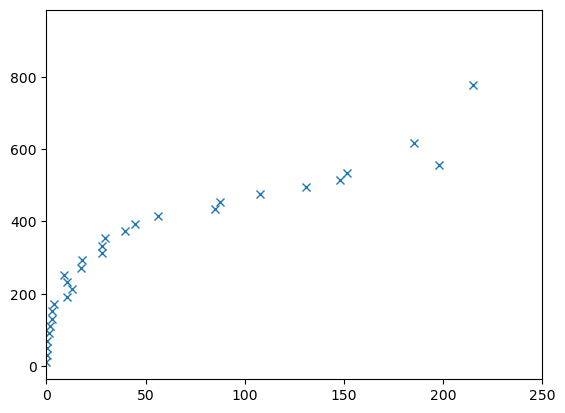

In [615]:
plt.plot(temp.time,temp.r,'x')
plt.xlim(0,250)

In [611]:
temp

<xarray.Dataset>
Dimensions:  (time: 50, r: 50)
Coordinates:
  * time     (time) float64 0.0 0.3 0.2 0.5 1.5 1.7 ... nan 413.0 nan nan nan
  * r        (r) float64 10.0 30.2 50.41 70.61 90.82 ... 939.4 959.6 979.8 1e+03
Data variables:
    *empty*

In [5]:
test=xr.open_dataset('/home/guttorm/Github/ACTOM/Test_docker/Output/Sensor_locations.nc')
test

<xarray.Dataset>
Dimensions:        (sensor: 8, source: 50)
Coordinates:
  * sensor         (sensor) int64 1 2 3 4 5 6 7 8
  * source         (source) int64 1 2 3 4 5 6 7 8 9 ... 43 44 45 46 47 48 49 50
Data variables:
    x_sensor       (sensor) float64 ...
    y_sensor       (sensor) float64 ...
    ns_per_sensor  (sensor) int64 ...
    x_source       (source) float64 ...
    y_source       (source) float64 ...
    N_over         int64 ...

In [6]:
test.x_sensor

<xarray.DataArray 'x_sensor' (sensor: 8)>
array([-9103413.395323, -9099294.766339, -9098083.404873, -9100930.104318,
       -9100687.832025, -9101959.761564, -9097417.156067, -9097538.292214])
Coordinates:
  * sensor   (sensor) int64 1 2 3 4 5 6 7 8

In [156]:
stats=xr.open_dataset('Temp_data/Data/statistics_65.nc')
stats

<xarray.Dataset>
Dimensions:         (x: 200, y: 100, dt: 3)
Coordinates:
  * x               (x) float64 2.895e+05 2.9e+05 ... 3.137e+05 3.142e+05
  * y               (y) float64 3.203e+06 3.203e+06 ... 3.215e+06 3.215e+06
  * dt              (dt) float64 900.0 1.8e+03 3.6e+03
Data variables:
    mean            (x, y) float64 ...
    var             (x, y) float64 ...
    max             (x, y) float64 ...
    delta_mean      (dt, x, y) float64 ...
    delta_mean_abs  (dt, x, y) float64 ...
    delta_var       (dt, x, y) float64 ...
    delta_max       (dt, x, y) float64 ...
    delta_min       (dt, x, y) float64 ...
Attributes: (12/33)
    max_prob:              0.0007019417826086283
    sum_prob:              1.2551407
    risk file:             ar56.8928.bm1310.slp3d.migration_conv_AGF_1_netcdf.nc
    threshold:             0.1
    cluster:               dbscan
    Probe file:            Indata/Probes/Probes_ar56_ex3.nc
    ...                    ...
    Fill type:             nearest extrapolation
    Downsampling:          False
    Downsampling factor:   16.0
    source tag:            65
    Origin:                [ 301871.83731921 3209278.57256398]
    location_probability:  82.54288

In [180]:
origin=stats.Origin
xx,yy=np.meshgrid(stats.x-origin[0],stats.y-origin[1], indexing='ij')
rr=np.sqrt(xx*xx+yy*yy)
stats=stats.assign_coords(xx=(['x','y'],xx))
stats=stats.assign_coords(yy=(['x','y'],yy))
stats=stats.assign_coords(rr=(['x','y'],rr))

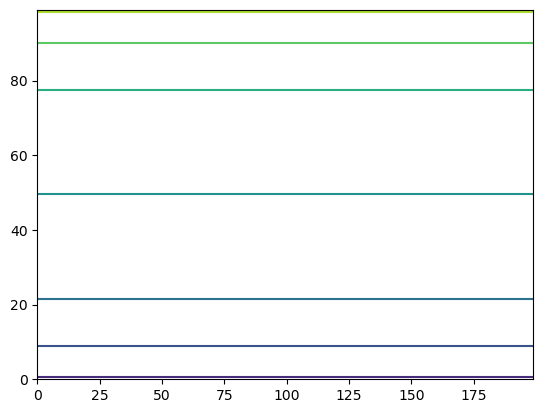

In [175]:
plt.contour(yy)

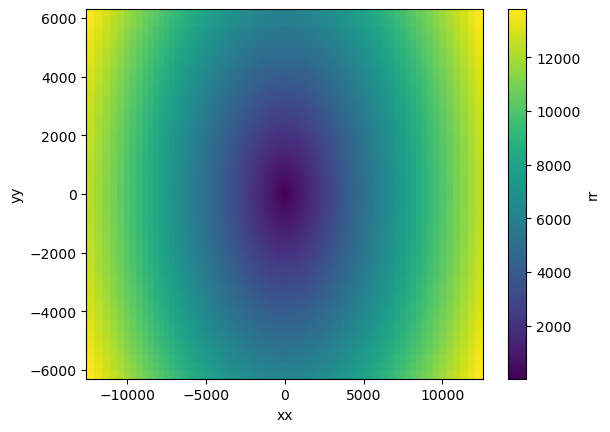

In [182]:
stats.rr.plot(x='xx',y='yy')

In [185]:
ss=stats.groupby('rr').mean()

In [602]:
ssb=stats.groupby_bins('rr', np.r_[0:2000:50]).mean()

In [603]:
ssb['mean']

<xarray.DataArray 'mean' (rr_bins: 39)>
array([0.07832433, 0.03247738, 0.01738625, 0.01242932, 0.00963184,
       0.00799304, 0.00664633, 0.0057919 , 0.0050095 , 0.00465494,
       0.00398282, 0.00367019, 0.0033078 , 0.0031078 , 0.00292423,
       0.00263383, 0.00245055, 0.00245048, 0.00220956, 0.0020536 ,
       0.00205125, 0.00185731, 0.00174607, 0.00177218, 0.0015931 ,
       0.00161268, 0.00154366, 0.00145171, 0.00139796, 0.00132562,
       0.00138951, 0.00118873, 0.00123882, 0.00124208, 0.00116432,
       0.00110073, 0.00114809, 0.00105455, 0.00104321])
Coordinates:
  * rr_bins  (rr_bins) object (0, 50] (50, 100] ... (1850, 1900] (1900, 1950]

(0.0, 250.0)

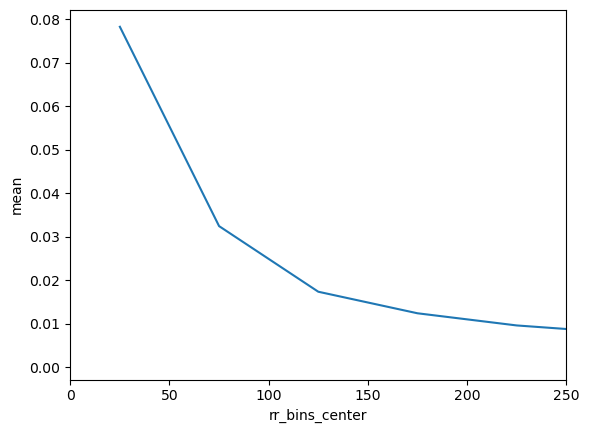

In [675]:
ssb['mean'].plot()
plt.xlim(0,250)


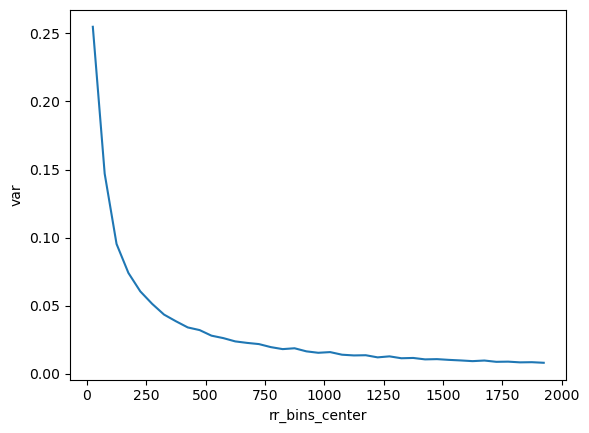

In [608]:
(1.96*np.sqrt(ssb['var'])).plot()

(0.0, 500.0)

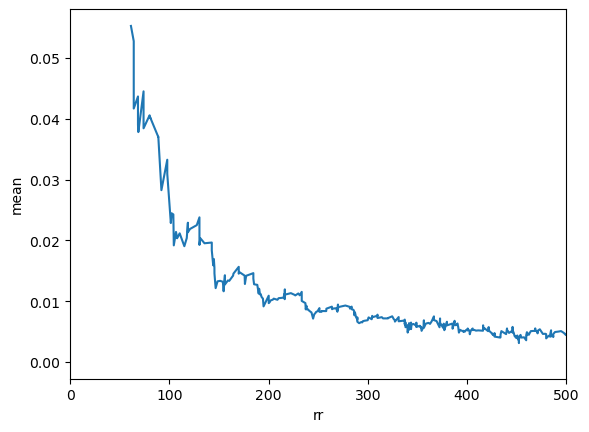

In [606]:
(ss['mean'].rolling(rr=10).mean()).plot()
plt.xlim(0,500)

In [668]:
stemm=xr.open_dataset('../../STEMM_CCS/Data/pos534.nc')
stemm

<xarray.Dataset>
Dimensions:  (Time: 130681)
Coordinates:
  * Time     (Time) datetime64[ns] 2019-05-10T09:00:00 ... 2019-05-25T12:00:00
Data variables:
    Press    (Time) float64 ...
    Temp     (Time) float64 ...
    Sal      (Time) float64 ...
    pH       (Time) float64 ...
    pCO2     (Time) float64 ...
Attributes:
    Latitude:   57.99767
    Longitude:  -0.37133

In [669]:
stemm.pCO2

<xarray.DataArray 'pCO2' (Time: 130681)>
[130681 values with dtype=float64]
Coordinates:
  * Time     (Time) datetime64[ns] 2019-05-10T09:00:00 ... 2019-05-25T12:00:00